<a href="https://colab.research.google.com/github/ShiftLove/ShiftLove/blob/main/Image_Classifier_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf. __version__

'2.8.2'

In [3]:
keras.__version__

'2.8.0'

In [4]:
#Loading fasion_mnist dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test, y_test) =fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
x_train_full.shape

(60000, 28, 28)

In [7]:
y_train_full.dtype

dtype('uint8')

#Scaling input features by divided them by 255

In [8]:
x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Identify the Class Names

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[0]]

'Coat'

#Creating the Model

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#Choice of the number of neurons. Choice of activation function

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Model Layers
model.layers

In [14]:
model.layers [2].name

'dense_1'

In [15]:
weights = model.layers[1].get_weights()[1]

In [16]:
weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
# Compile the Model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

#Training and Evaluating the model

In [19]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7407 - accuracy: 0.7527 - val_loss: 0.5513 - val_accuracy: 0.8130
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4918 - accuracy: 0.8286 - val_loss: 0.4541 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4458 - accuracy: 0.8453 - val_loss: 0.4434 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4181 - accuracy: 0.8533 - val_loss: 0.4006 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3968 - accuracy: 0.8603 - val_loss: 0.3975 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8658 - val_loss: 0.3805 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3671 - accuracy: 0.8693 - val_loss: 0.3605 - val_accuracy:

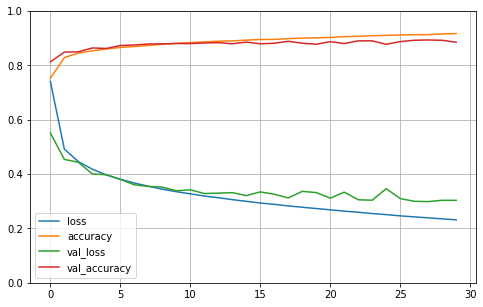

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
#Evaluating the Validation Accuracy on the Test SET

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 55.6694 - accuracy: 0.8585


[55.66936111450195, 0.8585000038146973]

In [ ]:
#Making Predictions using the model (Only first 3 instances of the test data)

In [26]:
X_new = x_test[:10]
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)